## Jupyter Notebook Assessment Task

[Repository Link](https://github.com/TurnipGuy30/Jupyter)

This program will do the following:

- Take data from av CSV file
- Clean and export the data
- Analyse and visualise the data

Please read the comments in the code to understand each section.

---

The first thing we should do is set up the modules we plan to use in the program.

In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# update matplotlib configuration for later use
plt.rcParams.update(
	{
		'font.size': 20,
		'figure.figsize': (10, 8)
	}
)

---

Now that the environment is set up, we can import our file.

In [4]:
# read CSV file and save to variable as DataFrame
pokemon = pd.read_csv('in/pokemon.csv')

In [5]:
# output DataFrame as table
pokemon

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,Hoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,Hoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


---

We can see that the DataFrame is now outputting to the screen.

Just running `pokemon` shows us the start and the end of the file; this already tells us a few things about the formatting of the data that are specific to a Pokémon database:

- Some Pokémon have alternate forms with the same `Number`.

Of course, these entries have different `index` values.

Looking at the original `pokemon.sql` file, the `PRIMARY KEY` property is given to the `Name` column. In SQL, the Primary Key property is given to a column which the programmer knows will never have duplicate values.

Because this property was given to the `Name` column, we should set that column to our `index` column.

- Some Pokémon only have one type.

There are two columns for Pokémon types: `Type_1` and `Type_2`. This is because Pokémon can have either one or two types.

However, this means that some Pokémon will have `NaN` `Type_2` values. This shouldn't make a difference to our program.

It is worth noting that for Pokémon with two types, the first type is more heaviliy weighted when it comes to game calculations.

- Each Pokémon is grouped into a `Generation` category.

This database contains Pokémon up to Gen VI, meaning that each entry will have a `Generation` value of `1` through `6`.

- Each Pokémon has six different statistics.

These stats are combined in the `Total` column.

- Some Pokémon are `Legendary` Pokémon

Each Pokémon has a boolean value in the `Legendary` column.

---

Now that we better understand out data, we can start performing the required cleaning.

In [7]:
# rename columns
pokemon.rename(columns={
	'Number': 'Dex',
	'Attack': 'ATK',
	'Defense': 'DEF',
	'Sp_Atk': 'SPA',
	'Sp_Def': 'SPD',
	'Speed': 'SPE',
	'Generation': 'Gen'
}, inplace=True)

In [8]:
# make column names lowercase
pokemon.columns = [col.lower() for col in pokemon]

In [6]:
# set index column to Name
pokemon.set_index('name', inplace=True)

---

Let's see how it changed.

In [10]:
pokemon

,dex,type_1,type_2,total,hp,atk,def,spa,spd,spe,gen,legendary
Name,,,,,,,,,,,,
Bulbasaur,1,Grass,Poison,318,45,49,49,65,65,45,1,False
Ivysaur,2,Grass,Poison,405,60,62,63,80,80,60,1,False
Venusaur,3,Grass,Poison,525,80,82,83,100,100,80,1,False
Mega Venusaur,3,Grass,Poison,625,80,100,123,122,120,80,1,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Diancie,719,Rock,Fairy,600,50,100,150,100,150,50,6,True
Mega Diancie,719,Rock,Fairy,700,50,160,110,160,110,110,6,True
Hoopa Confined,720,Psychic,Ghost,600,80,110,60,150,130,70,6,True


---

Looking good! Let's move on.

---

Now that the data is organised, we can look for empty pieces of data.

In [11]:
# show sum of NaN data
pokemon.isnull().sum()

dex            0
type_1         0
type_2       386
total          0
hp             0
atk            0
def            0
spa            0
spd            0
spe            0
gen            0
legendary      0
dtype: int64

We can see that the only column containing empty data is `type_2`. This is the expected result.

Now that the data is clean, we can export the file before moving on to visualisation.

In [9]:
# export DataFrame to file
pokemon.to_csv('out/pokemon.csv')

---

Let's start visualising parts of the DataFrame.

We'll start by looking at the corrolation between Attack and Defense stats.

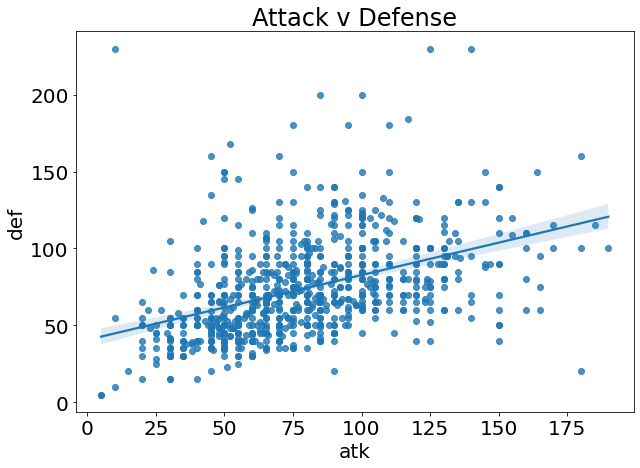

In [12]:
# create scatter plot from DataFrame
fig = plt.figure(figsize = (10, 7))
sns.regplot(
	x = pokemon['atk'],
	y = pokemon['def']
);
plt.title('Attack v Defense');